# WeRateDogs Data Wrangling Project
##### The purpose of this project is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

##### The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

In [284]:
import tweepy
import requests
import urllib3
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Gather Data for this Project
#### Data Sources

twitter_archive: The WeRateDogs Twitter archive, provided by the Udacity Course as a download

image_predictions: The tweet image predictions, hosted Udacity's servers and downloaded programmatically.

tweet_data: JSON document downloaded using the Twitter API (Tweepy library)


In [285]:
# Read twitter-archive-enhanced.csv 
df_1 = pd.read_csv('twitter_archive_enhanced.csv')

In [286]:
# Download image-predictions.tsv file
urllib.request.urlretrieve('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv?accessType=DOWNLOAD', 'image_predictions.tsv')


('image_predictions.tsv', <http.client.HTTPMessage at 0x7ff99a85e908>)

In [287]:
# Read image-predictions.tsv
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')

consumer_key = 'xxxxx'
consumer_secret = 'xxxxxx'
access_token = 'xxxxxxx'
access_secret = 'xxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [288]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [289]:
# Read tweet_json.txt
df_3 = pd.read_json('tweet_json.txt',lines=True)

In [290]:
# Extract only needed columns
df_3 = pd.DataFrame(df_3, columns = ['id', 'retweet_count', 'favorite_count'])

# Assess Data for this Project

In [291]:
# Look at data structure
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [292]:
# No duplicate tweets
len(df_1.tweet_id.unique())

2356

In [293]:
# Number of Tweets that have been retweeted
pd.DataFrame(df_1, columns = ['retweeted_status_id'])[pd.DataFrame(df_1, columns = ['retweeted_status_id']).retweeted_status_id>0].count()

retweeted_status_id    181
dtype: int64

In [294]:
# Count number of entries with odd numerators and denomentors
print(pd.DataFrame(df_1, columns = ['rating_numerator'])[pd.DataFrame(df_1, columns = ['rating_numerator']).rating_numerator<10].count())
print(pd.DataFrame(df_1, columns = ['rating_denominator'])[pd.DataFrame(df_1, columns = ['rating_denominator']).rating_denominator!=10].count())

rating_numerator    440
dtype: int64
rating_denominator    23
dtype: int64


In [295]:
# Visually assess columns 'rating_numerator'|'rating_denominator'|'name'|'pupper'|'puppo'|'doggo'
pd.DataFrame(df_1, columns = ['rating_numerator','rating_denominator','name','pupper','puppo', 'doggo'])

,rating_numerator,rating_denominator,name,pupper,puppo,doggo
0,13,10,Phineas,None,None,None
1,13,10,Tilly,None,None,None
2,12,10,Archie,None,None,None
3,13,10,Darla,None,None,None
4,12,10,Franklin,None,None,None
5,13,10,None,None,None,None
6,13,10,Jax,None,None,None
7,13,10,None,None,None,None
8,13,10,Zoey,None,None,None
9,14,10,Cassie,None,None,doggo


In [296]:
# check for odd looking names
df_1.name.value_counts().head(40)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Buddy      7  
Bailey     7  
an         7  
Toby       7  
Daisy      7  
Bella      6  
Stanley    6  
Jax        6  
Oscar      6  
Koda       6  
Scout      6  
Milo       6  
Rusty      6  
Jack       6  
Dave       6  
Leo        6  
George     5  
Alfie      5  
Oakley     5  
Larry      5  
Phil       5  
Sammy      5  
very       5  
Finn       5  
Sunny      5  
Bentley    5  
Gus        5  
Name: name, dtype: int64

In [297]:
#check for records with no images
df_1.expanded_urls.isnull().sum()

59

In [298]:
# Check structure
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [299]:
# No duplicate tweets_id
len(df_2.tweet_id.unique())

2075

In [300]:
# check structure
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


### Issues

#### Quality (at least 8 issues)


Validity

1 - There are entries with odd dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such), remove them (df_1)

2 - We don't need retweet data or in_reply data in this project (df_1)

>DELETE COLUMNS "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

3 - Datatypes are wrong 
>tweet_id are int64, convert to str (df_1, df_2, df_3)

>timestamp is an object, convert to timestamp (df_1)

4 - We only need records with images, so delete records where 'expanded_urls' is NaN (df_1)

Consistency

5 - id needs to be changed to tweet_id (df_3)

6 - There are inconsistent denominators, some denominators are not equal to 10 (df_1)

7 - There are inconsistent numerators, some numerators are below 10 (df_1)

8 - Change the source contents for better readability; change the long url links into words (df_1).

#### Tidiness (at least 2 issues)

1 - There are 3 separate tables (let's merge them)

2 - dog stages are in multiple columns (we can combine them into one column)

# Clean Data for this Project

In [301]:
# make copies of the Dataframes
df1_copy = df_1.copy()
df2_copy = df_2.copy()
df3_copy = df_3.copy()

### Tidiness

#### QUALITY ISSUE 5  FIRST! : id needs to be changed to tweet_id (df_3)

#### Code:

In [302]:
# use 'rename' rename column
df_3 = df_3.rename(columns={"id": "tweet_id"})

#### Test:

In [303]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


#### ISSUE 1: There are 3 separate tables (let's merge them)

#### Code:

In [304]:
# merge df1 and df3 with an 'inner join'
df_1 = pd.merge(df_1, df_3,
                        how = 'inner', on = 'tweet_id')
# merge df1 (the new one) and df2 with an 'inner join'
df_1 = pd.merge(df_1, df_2,
                        how = 'inner', on = 'tweet_id')

#### Test:

In [305]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

#### ISSUE 2: dog stages are in multiple columns (we can combine them into one column)

#### Code:

In [306]:
# show top 'None' values for 'doggo'
df_1[df_1['doggo'] == 'None'].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [307]:
# use a for loop to replace all the 'None' before cat
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in dog_stage:
        df_1[i] = df_1[i].replace('None', '')

In [308]:
# use cat to combine 
df_1['dog_stage'] = df_1.doggo.str.cat(df_1.floofer).str.cat(df_1.pupper).str.cat(df_1.puppo)

# drop the four old columns
df_1 = df_1.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
df_1['dog_stage'] = df_1['dog_stage'].replace('', np.nan)

In [310]:
#change records with muli
df_1.loc[df_1.dog_stage == 'doggopuppo', ['dog_stage']] = 'doggo, puppo'
df_1.loc[df_1.dog_stage == 'doggofloofer', ['dog_stage']] = 'doggo, floofer'
df_1.loc[df_1.dog_stage == 'doggopupper', ['dog_stage']] = 'doggo, pupper'

#### Test:

In [311]:
df_1['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [312]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

### Quality

#### ISSUE 1: There are entries with odd dog names (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such), rename them to 'None'

#### Code:

In [313]:
# make list of odd names
odd_names =['actually','the', 'just', 'by', 'his', 'such', 'one', 'very', 'quite', 'not',  
             'mad', 'space', 'infuriating', 'all', 'a', 'an','officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly']

# use nested 'if' in 'for' loop to apply names
for name in df_1.name:
    if name in odd_names:
        df_1.name[df_1.name == name] = 'None'

#### Test:

In [314]:
df_1.name.value_counts()

None         673
Charlie      11 
Tucker       10 
Lucy         10 
Penny        10 
Cooper       10 
Oliver       10 
Winston      8  
Sadie        8  
Bo           8  
Lola         8  
Daisy        7  
Toby         7  
Bella        6  
Rusty        6  
Scout        6  
Milo         6  
Jax          6  
Koda         6  
Bailey       6  
Stanley      6  
Dave         6  
Buddy        5  
Alfie        5  
Chester      5  
Louis        5  
Larry        5  
Oscar        5  
Leo          5  
Gary         4  
            ..  
Moofasa      1  
DonDon       1  
Emanuel      1  
Lambeau      1  
Orion        1  
Dietrich     1  
Pinot        1  
Snickers     1  
Brian        1  
Joshwa       1  
Eugene       1  
Bobbay       1  
Ike          1  
Creg         1  
Amber        1  
Theo         1  
Clarq        1  
Monkey       1  
Ace          1  
Lassie       1  
Skittles     1  
Major        1  
Murphy       1  
Carll        1  
Gert         1  
Binky        1  
Wishes       1  
Fiji         1

#### ISSUE 2 :  We don't need retweet data or in_reply data in this project (df_1)

#### Code:

In [315]:
# drop the columns
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
           'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id']

df_1 = df_1.drop(columns, axis = 1)

#### Test:

In [316]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool

#### ISSUE 3: convert all the wrong datatypes to correct correct ones

#### Code:

In [317]:
#2 - tweet_id are int64, convert to str using 'astype'(df_1, df_2, df_3)
df_1.tweet_id = df_1.tweet_id.astype('str')

#3 - timestamp is an object, convert to timestamp using 'timestamp'(df_1)
df_1.timestamp = pd.to_datetime(df_1.timestamp)

#### Test:

In [318]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-

#### ISSUE 4: We only need records with images, so delete records where 'expanded_urls' is NaN (df_1)

#### Code:

In [319]:
# remove records without images 
df_1 = df_1.dropna(subset = ['expanded_urls'])

#### Test:

In [320]:
df_1.expanded_urls.isnull().sum()

0

#### ISSUE 6: There are inconsistent denominators, some denominators are not equal to 10, search text! (df_1)

#### Code:

In [321]:
# Show records with denominator not equal to 10, search for records with incorrect rating extracted
pd.set_option('display.max_colwidth', -1)
df_1[df_1['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [322]:
# tweet_ids "740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296"
# Have been identified to have the wrong ratings extracted
# let's correct them
df_1.loc[df_1.tweet_id == '740373189193256964', ['rating_denominator']] = 10
df_1.loc[df_1.tweet_id == '722974582966214656', ['rating_denominator']] = 10
df_1.loc[df_1.tweet_id == '716439118184652801', ['rating_denominator']] = 10
df_1.loc[df_1.tweet_id == '682962037429899265', ['rating_denominator']] = 10
df_1.loc[df_1.tweet_id == '666287406224695296', ['rating_denominator']] = 10

#### Test:

In [323]:
# check one of the records
df_1[df_1['tweet_id'] == '666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2052,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,10,None,71,152,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN


#### ISSUE 7: There are inconsistent numerators, some numerators are below 10, search text! (df_1)

#### Code:

In [324]:
#based on previous search we know that 
#tweet_ids "740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296"
#had the wrong numerators extracted as well
df_1.loc[df_1.tweet_id == '740373189193256964', ['rating_numerator']] = 14
df_1.loc[df_1.tweet_id == '722974582966214656', ['rating_numerator']] = 13
df_1.loc[df_1.tweet_id == '716439118184652801', ['rating_numerator']] = 11
df_1.loc[df_1.tweet_id == '682962037429899265', ['rating_numerator']] = 10
df_1.loc[df_1.tweet_id == '666287406224695296', ['rating_numerator']] = 9


#### Test:

In [325]:
# check one of the records
df_1.loc[df_1.tweet_id =='666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2052,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,None,71,152,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN


#### ISSUE 8: Change the source contents for better readability; change the long url links into words (df_1).

#### Code:

In [326]:
# display unique values for 'source'
df_1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [327]:
# simplify the source (shorten the urls into words)
       
df_1['source'] = df_1['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
df_1['source'] = df_1['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
df_1['source'] = df_1['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

#### Test:

In [328]:
df_1['source'].value_counts()

Twitter for iphone    2032
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

# Store, Analyze, and Visualize Data for this Project

## Store

In [329]:
# store df1_clean dataframe as a csv named 'twitter_archive_master.csv'
df_1.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analysis

#### 1 - Distribution of Dog Development Stages

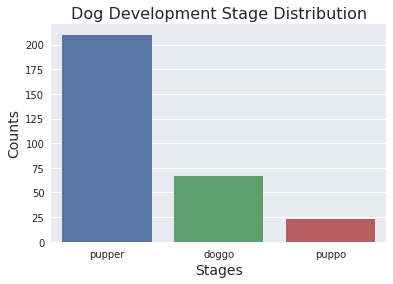

In [334]:
# create a bar-graph
sorted_stage = df_1['dog_stage'].value_counts().head(3).index
sns.set(style="darkgrid")
b = sns.countplot(data = df_1, x = 'dog_stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Stages', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Dog Development Stage Distribution',fontsize=16)
fig = b.get_figure()
fig.savefig('stage_bar.png')

The distribution of dog stages shows that the ‘pupper’ dog development stage (a small doggo) is the most prevalent dog stage. It is followed by the ‘doggo’ and ‘puppo’ dog development stages. This can be explained by the fact the unmature dogs are cuter than their adult counterparts. A small note however, there was huge amount missing data in dog stages, thus the distribution can be slightly skewed and not reflect the truth at all...

#### 2 - Distribution of retweet_count and favorite_count

In [275]:
favorities_lognormed = df_1.favorite_count[df_1.favorite_count <= 0] = 1
retweets_lognormed = df_1.retweet_count[df_1.retweet_count <= 0] = 1

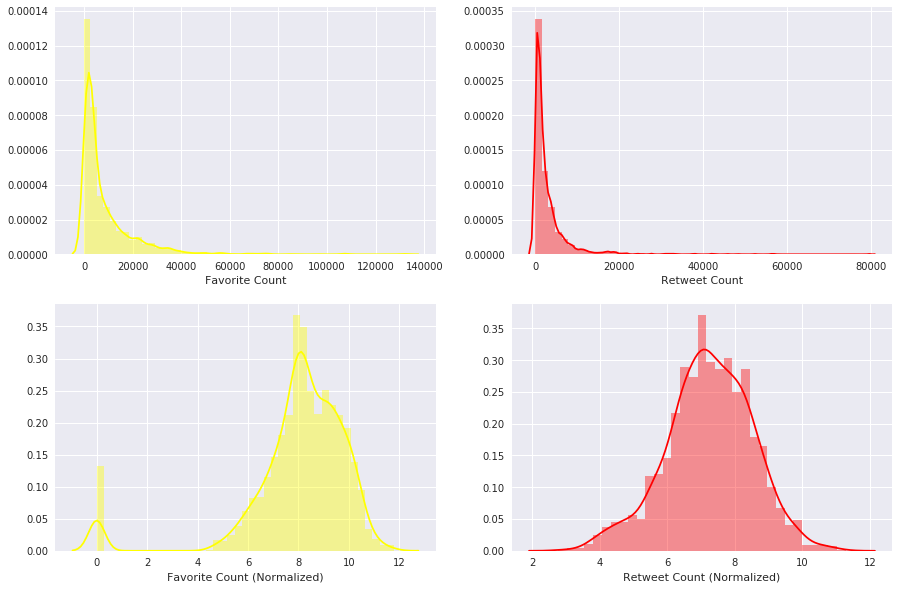

In [276]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(df_1.favorite_count, color = 'yellow', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(df_1.retweet_count, color = 'red', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(df_1.favorite_count.apply(np.log), color = 'yellow', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(df_1.retweet_count.apply(np.log), color = 'red', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

plt.show()
f.savefig('dist_plots.png')

The non-normalized distributions for both favorites count and retweet count have long positive tails. This suggests that top end popular tweets are super rare. The normalized graphs also show similar distributions. The similarities between the two variables might give insight that they are both correlated… See next graph.

#### 3 - Correlation between retweet_count and favorite_count

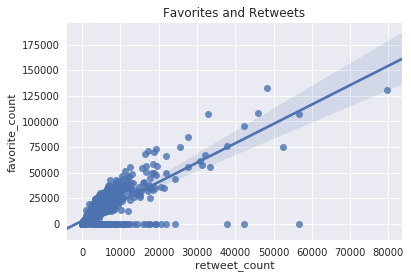

In [277]:
g = sns.regplot(x=df_1.retweet_count, y=df_1.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [278]:
df_1.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.197406,0.013118,0.010398,-0.000133,-0.008847,-0.028702,-0.021248,-0.033844,-0.005813,-0.028686
rating_denominator,0.197406,1.000000,-0.021285,-0.025586,-0.003260,-0.000961,-0.000632,-0.039972,-0.002249,-0.005261,0.003343
retweet_count,0.013118,-0.021285,1.000000,0.790481,0.105534,0.044739,0.006092,-0.008619,0.017197,-0.035511,0.006140
favorite_count,0.010398,-0.025586,0.790481,1.000000,0.132241,0.076078,0.056156,-0.022787,0.060114,-0.053427,0.043928
img_num,-0.000133,-0.003260,0.105534,0.132241,1.000000,0.203071,0.026060,-0.159690,0.045653,-0.139454,0.059565
p1_conf,-0.008847,-0.000961,0.044739,0.076078,0.203071,1.000000,0.118777,-0.511547,0.131969,-0.709583,0.109022
p1_dog,-0.028702,-0.000632,0.006092,0.056156,0.026060,0.118777,1.000000,0.112147,0.634661,0.048809,0.555778
p2_conf,-0.021248,-0.039972,-0.008619,-0.022787,-0.159690,-0.511547,0.112147,1.000000,0.100462,0.478953,0.067387
p2_dog,-0.033844,-0.002249,0.017197,0.060114,0.045653,0.131969,0.634661,0.100462,1.000000,0.042869,0.550166
p3_conf,-0.005813,-0.005261,-0.035511,-0.053427,-0.139454,-0.709583,0.048809,0.478953,0.042869,1.000000,0.041768


Just like I suspected there seems to be a strong positive relationship (r-squared is 0.790481) between ‘retweet_count’ and ‘favorite_count’. My guess is that most the popular tweets get retweeted and favorited because of its popularity. 

#### 4 - Distribution of source

Twitter for iphone    2032
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64


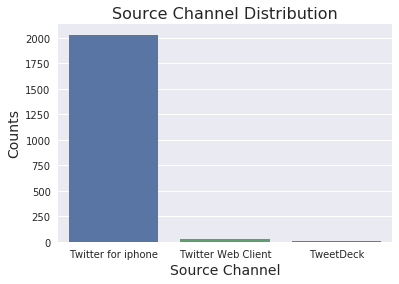

In [279]:
sorted_source = df_1['source'].value_counts().index
print(df_1['source'].value_counts())
sns.set(style="darkgrid")
s = sns.countplot(data = df_1, x = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Source Channel', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Source Channel Distribution',fontsize=16)
fig = s.get_figure()
fig.savefig('source_bar.png')

This clearly shows that Twitter for iPhone is the dominant channel source for WeRateDogs tweets, retweets, posts, and others. Hardly no one uses either the twitter web client or tweetDeck for the WeRateDogs channel... 

# Resources
1- 
https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

2-
https://github.com/wanderly0501/Data-Wrangling-of-WeRateDogs-Tweet-Archive/blob/master/wrangle_act.ipynb